# Sentdex: Neural Networks and Deep Learning 4: Training the Model

* Getting, preparing, formatting etc. data is very important and most of the time is spent on that.
* Torchvision is used to import datasets


In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

* Its important to split your training and test data sets,     
the model should never see the test dataset until the time of testing,                   
  otherwise the model will report higher accuracy than it actually is.

In [ ]:
train = datasets.MNIST("", train = True, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()])) 

test = datasets.MNIST("", train = False, download = True,
                       transform = transforms.Compose([transforms.ToTensor()])) 

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


* The NN model looks for the shortest path to decrease the loss/cost function.                                                                   
We use batches to restrict this in order to train for generalisation.

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size =10, shuffle = True)

testset = torch.utils.data.DataLoader(test, batch_size =10, shuffle = True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0]

print(y)


tensor(9)


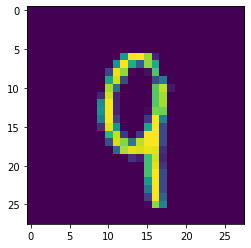

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [ ]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


* Its important for our data to be good in quaility. Or else tradh in and trash out. 

* So we need a balanced data set. That means there are the same number of examples for each classification in training.



In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0 }

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total+=1

print(counter_dict)    
print(total)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
60000


In [ ]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


* This data is fairly balanced, no single class has percentage that is too big or too small.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28))
X = X.view(1, 28*28)
print(X)

In [ ]:
output = net(X)

In [ ]:
output

tensor([[-2.3577, -2.3520, -2.3263, -2.2655, -2.4032, -2.3090, -2.2385, -2.3553,
         -2.2009, -2.2371]], grad_fn=<LogSoftmaxBackward>)

* Our goal is to minimize the loss function
* The function of the optimizer is to adjust the weights and minimize the loss function slowly over time(learning rate)

In [ ]:
import torch.optim as optim 

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCH = 3

for epoch in range(EPOCH):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.2214, grad_fn=<NllLossBackward>)
tensor(0.2153, grad_fn=<NllLossBackward>)
tensor(0.0686, grad_fn=<NllLossBackward>)


* If your optimizer has big learnig steps/ rate you will not reduce the loss function and be stuck at a point. 
* Similar case when the learning rate is too small. So we need a balanced LR.
* There is no way we can have prior knowledge about the best learning rate for a model.
* So for complicated models, we use decaying learning rate.
* This means we first use giant LR's and then over time we reduce it's size.
* We wont be using it here, but in most real world problems, we do.


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in testset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct +=1 
      total += 1

print(" Accuracy: ", round(correct/total, 3))

 Accuracy:  0.974


<function matplotlib.pyplot.show>

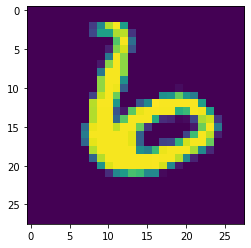

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show

In [ ]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(6)
